# Comparison between the types (after controlling for age and gender)

# Loads

## Libraries and functions

In [2]:
source("load_libraries.R")

Warning message in is.na(x[[i]]):
“is.na() applied to non-(list or vector) of type 'environment'”Warning message in rsqlite_fetch(res@ptr, n = n):
“Don't need to call dbFetch() for statements, only for queries”

*
*  Package WGCNA 1.63 loaded.
*
*    Important note: It appears that your system supports multi-threading,
*    but it is not enabled within WGCNA in R. 
*    To allow multi-threading within WGCNA with all available cores, use 
*
*          allowWGCNAThreads()
*
*    within R. Use disableWGCNAThreads() to disable threading if necessary.
*    Alternatively, set the following environment variable on your system:
*
*          ALLOW_WGCNA_THREADS=<number_of_processors>
*
*    for example 
*
*          ALLOW_WGCNA_THREADS=4
*
*    To set the environment variable in linux bash shell, type 
*
*           export ALLOW_WGCNA_THREADS=4
*
*     before running R. Other operating systems or shells will
*     have a similar command to achieve the same aim.
*


Allowing multi-threading with up to 4 threads.
[1] "preparing gene to GO mapping data..."
[1] "preparing IC data..."
[1] "preparing gene to GO mapping data..."
[1] "preparing IC data..."
[1] "preparing gene to GO mapping data..."
[1] "prepar

In [3]:
source("functions.R")

## Data

In [4]:
load("../results/dge/gene_length.RData")
load("../results/dge/metadata.RData")
load("../results/dge/norm_counts.RData")
load("../results/dge/dge.RData")

In [5]:
load("../results/dge/dge_net.RData")
load("../results/dge/dge_layout.RData")
load("../results/dge/dge_net_connected_gene_colors.RData")
load("../results/dge/dge_net_pal2.RData")

In [6]:
module_nb = length(unique(connected_gene_colors))
pal2 = c(pal2, "white", "black")

In [7]:
# Comparison between the ages (after controlling for type and gender)
GF_SPF = results(dge,contrast= c(0,0,1,0,0,0,0,1/2,1/3,1/3), alpha=0.05, test="Wald")

In [8]:
samples = c(
    'SPF_8w_F_1_2','SPF_8w_F_3_2','SPF_8w_F_4_2','SPF_8w_F_5_2','SPF_52w_F_1_2','SPF_52w_F_2_2','SPF_52w_F_3_2','SPF_52w_F_4_2','SPF_52w_F_5_2','SPF_52w_F_6_2','SPF_104w_F_1_2','SPF_104w_F_2_2','SPF_104w_F_3_2',
    'SPF_8w_M_1_2','SPF_8w_M_2_2','SPF_8w_M_3_2','SPF_8w_M_4_2','SPF_52w_M_1_2','SPF_52w_M_2_2','SPF_52w_M_3_2','SPF_52w_M_4_2','SPF_52w_M_5_2','SPF_104w_M_1_2','SPF_104w_M_2_2','SPF_104w_M_3_2','SPF_104w_M_4_2','SPF_104w_M_5_2','SPF_104w_M_6_2','SPF_104w_M_7_2','SPF_104w_M_8_2','SPF_104w_M_9_2','SPF_104w_M_10_2','SPF_104w_M_11_2','SPF_104w_M_12_2','SPF_104w_M_13_2','SPF_104w_M_14_2',
    'GF_8w_F_1_2','GF_8w_F_2_2','GF_8w_F_3_2','GF_8w_F_4_2','GF_8w_F_5_2','GF_52w_F_1_2','GF_52w_F_2_2','GF_52w_F_3_2','GF_52w_F_4_2','GF_52w_F_5_2','GF_52w_F_6_2','GF_104w_F_1_2','GF_104w_F_2_2','GF_104w_F_3_2',
    'GF_8w_M_1_2','GF_8w_M_2_2','GF_8w_M_3_2','GF_8w_M_4_2','GF_52w_M_1_2','GF_52w_M_2_2','GF_52w_M_3_2','GF_52w_M_4_2','GF_104w_M_1_2','GF_104w_M_2_2')
annot = as.data.frame(colData(dge)[, c("type", "gender", "age")])

# Stats

In [9]:
type_global_stats = matrix(0, nrow=1, ncol=3)
rownames(type_global_stats) = c("GF VS SPF")
colnames(type_global_stats) = c("Wald padj < 0.05", "LFC > 0 (Wald padj < 0.05)", "LFC < 0 (Wald padj < 0.05)")
type_global_stats[1,] = get_stats_padj(GF_SPF)
type_global_stats

,Wald padj < 0.05,LFC > 0 (Wald padj < 0.05),LFC < 0 (Wald padj < 0.05)
GF VS SPF,2561,1063,1498


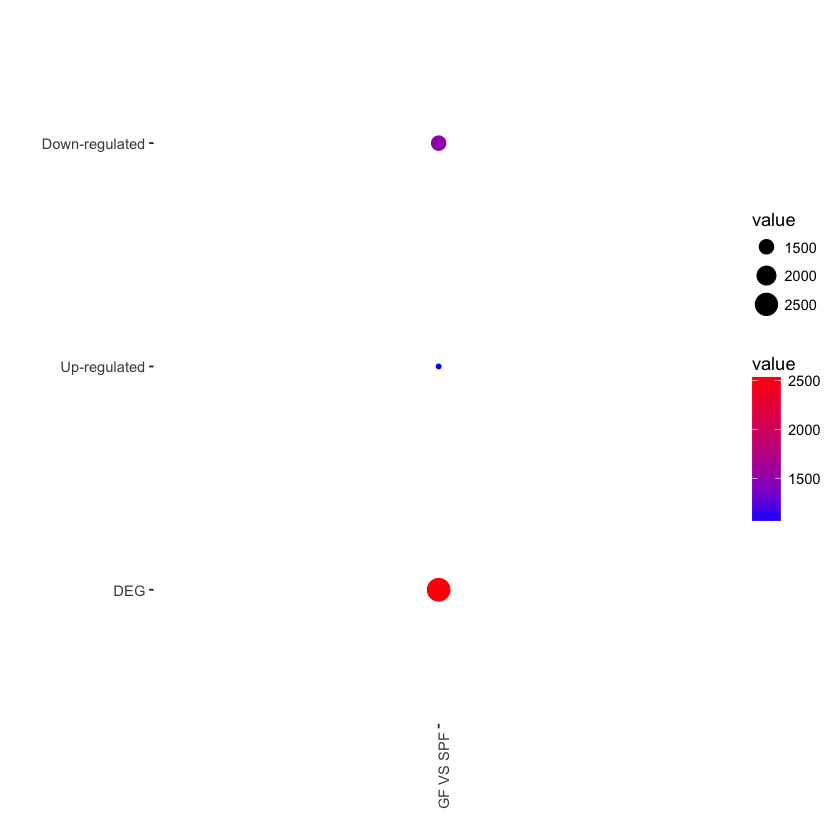

In [10]:
plot_stat_mat(type_global_stats)

# Differentially expressed genes

In [11]:
type_data = list(GF_SPF)
names(type_data) = c("GF VS SPF")
type_deg = extract_diff_expr_genes(type_data, "type-effect/type/")

GF VS SPF 
0.2315502 


Warning message in pcls(G):
“initial point very close to some inequality constraints”Warning message in stack.default(getgo(rownames(l$deg), "mm10", "geneSymbol")):
“non-vector elements will be ignored”Warning message in stack.default(getgo(rownames(as.data.frame(l$deg)), "mm10", "geneSymbol", :
“non-vector elements will be ignored”Warning message in is.na(interesting_cat[, x]):
“is.na() applied to non-(list or vector) of type 'NULL'”

# DEG into gene co-expression network

- White: up-regulated 
- Black: down-regulated

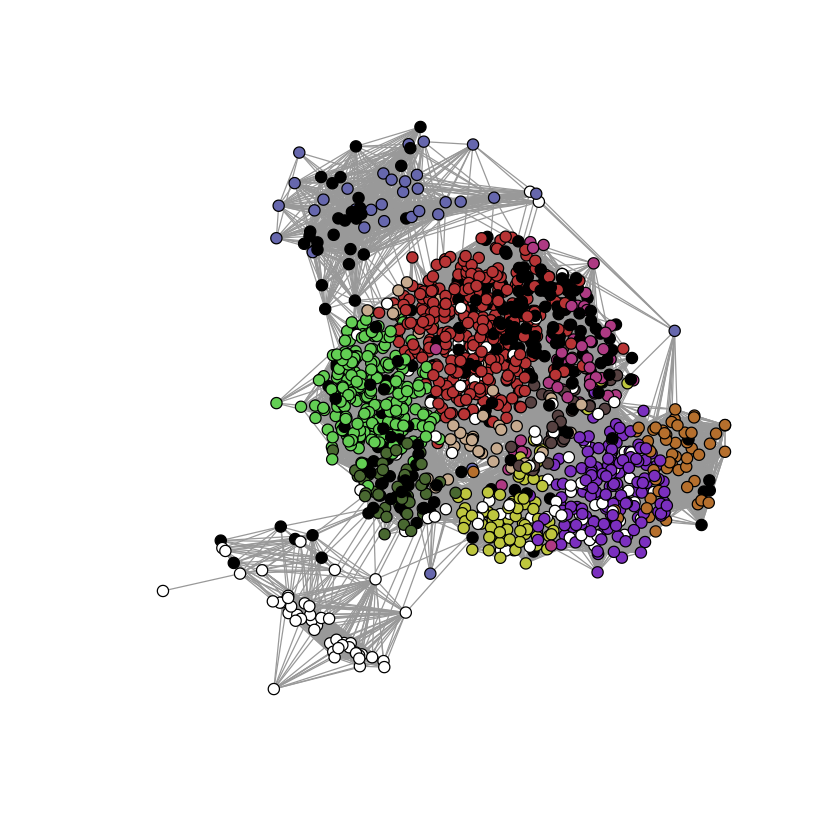

In [12]:
col_GF_vs_SPF = get_deg_colors(type_deg, "GF VS SPF", connected_gene_colors, module_nb) 
plot_net_with_layout(net, col_GF_vs_SPF, pal2, layout, add_legend = F)

# GO analysis

In [13]:
full_go_desc = type_deg$GO_wall[[1]][,"term"]
names(full_go_desc) = type_deg$GO_wall[[1]][,"category"]

## Biological process

Dot-plot with the most over-represented GO (20 most significant p-values for the different comparison)

Using term, id as id variables
Using term, id as id variables


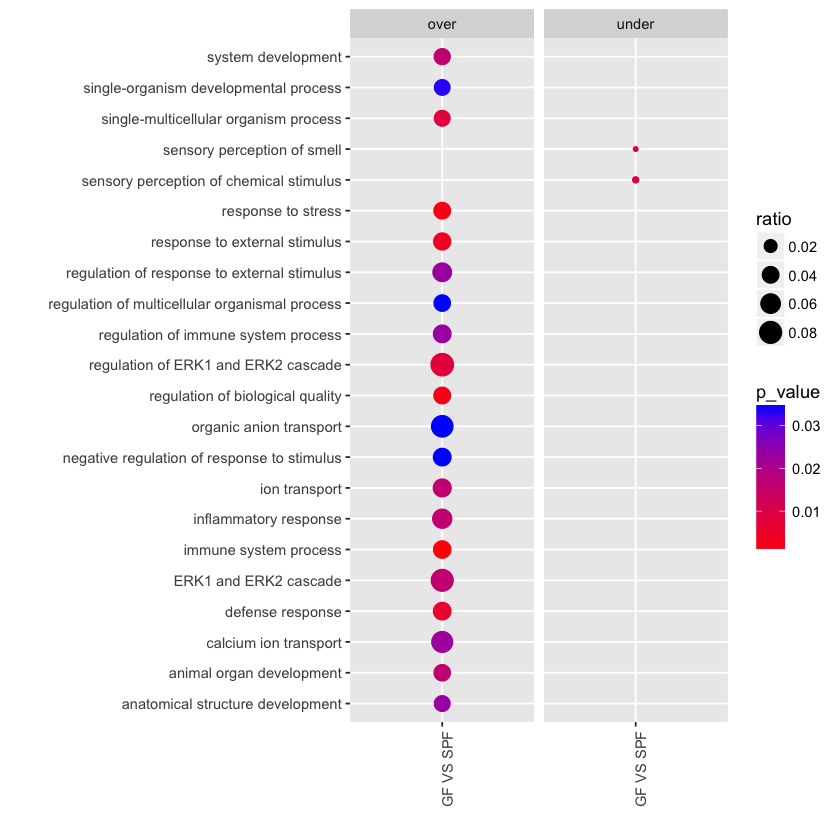

In [14]:
plot_top_go(type_deg$over_represented_GO,
            type_deg$under_represented_GO,
            type_deg$GO_wall,
            "BP",
            20)

In [26]:
over_gos = type_deg$over_represented_GO[,"category"]
under_gos = type_deg$under_represented_GO[,"category"]
dotRes = getAmigoTree(goIDs=c(over_gos, under_gos),
                      color=c(rep("red", length(over_gos)), rep("blue", length(under_gos))),
                      filename="../results/dge/type-effect/type/go/GF_VS_SPF",
                      picType="png",
                      saveResult=TRUE)

![](../results/dge/type-effect/type/go/GF_VS_SPF.png)

GO Tree at "../results/dge/type-effect/type/go/GF_VS_SPF.png"

## Cellular components

Dot-plot with the most over-represented GO (20 most significant p-values for the different comparison)

In [ ]:
plot_top_go(type_deg$over_represented_GO,
            type_deg$under_represented_GO,
            type_deg$GO_wall,
            "CC",
            20)

## Molecular functions

Dot-plot with the most over-represented GO (20 most significant p-values for the different comparison)

In [ ]:
plot_top_go(type_deg$over_represented_GO,
            type_deg$under_represented_GO,
            type_deg$GO_wall,
            "MF",
            20)

# KEGG pathways

In [ ]:
plot_kegg_pathways(type_deg$over_represented_KEGG[,"category"],
                   type_deg$fc_deg,
                   "../results/dge/type-effect/type/kegg/over_repr_kegg/")

Pathway graphs available at [../results/dge/age-effect/age/over_repr_kegg/](../results/dge/age-effect/age/over_repr_kegg/)

In [ ]:
plot_kegg_pathways(type_deg$under_represented_KEGG[,"category"],
                   type_deg$fc_deg,
                   "../results/dge/type-effect/type/kegg/under_repr_kegg/")

Pathway graphs available at [../results/dge/age-effect/age/under_repr_kegg/](../results/dge/age-effect/age/under_repr_kegg/)